`wu_data_gen_perfect_rand_phase.ipynb`

> Generating noise-free wrapped angle data for TensorFlow training with random phase

In [3]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter
from plot_styles import set_plotstyles
set_plotstyles()
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

> All the data will have the random phase $\phi = 0 $ to $\phi = 2\pi$, and the same set of frequencies $\nu$. 
> $\tau$ will vary from -100 ns to 100 ns, with 10000 values.

In [4]:
# frequencies
# from 0.100 GHZ to 0.200 GHz, 1024 channels, 
# (9.77517107e-05 GHz per channel)
freqs = np.linspace(0.1, 0.2, 1024)

# delay time tau 
# from -100 ns to 100 ns
# (in steps of 1 ns)
abs_max_tau = 100 
num_taus = 10000
taus = np.linspace(-abs_max_tau, abs_max_tau, num_taus)

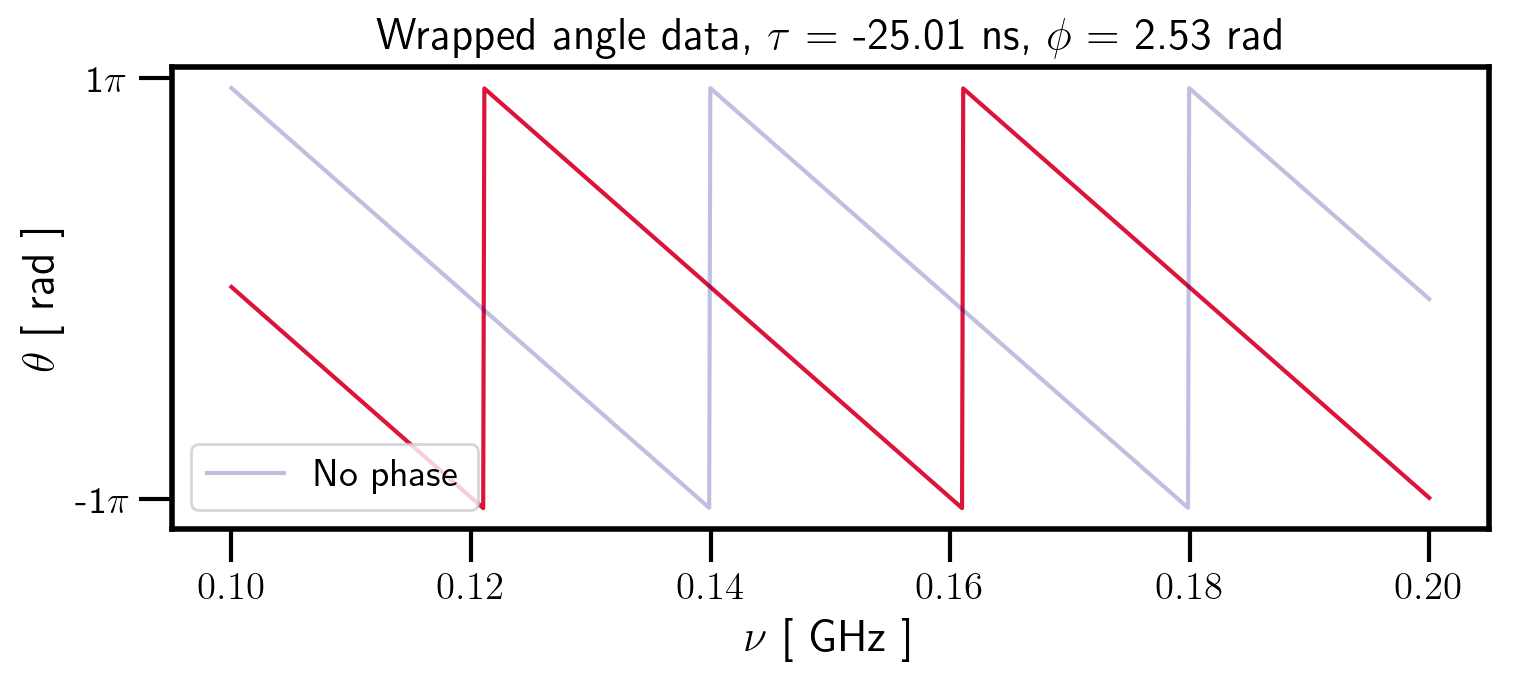

In [13]:
# plot a random tau with random phase
fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 100)
tau_choice = np.random.choice(taus)
phi = np.random.uniform(high = 2 * np.pi)
w_angles = np.angle(np.exp(2 * np.pi * 1j * (tau_choice * freqs + phi)))

ax.plot(freqs, w_angles,
        color = 'crimson')

w_angles = np.angle(np.exp(2 * np.pi * 1j * (tau_choice * freqs + 0)))

ax.plot(freqs, w_angles,
        color = 'darkblue', alpha = 0.25, label = 'No phase')

ymax = int(np.pi + np.pi * round(float(np.ceil(ax.get_ylim()[1]))/(np.pi)))
ymin = int(np.pi * round(float(np.floor(ax.get_ylim()[0]))/(np.pi)))
yticks = np.arange(ymin, ymax, np.pi)[::2]
ax.set_yticks(yticks)
ax.set_yticklabels([r"{}$\pi$".format(int(round(value / np.pi))) for value in ax.get_yticks()])
ax.set_ylabel(r'$\theta$ [ rad ]')
ax.set_xlabel(r'$\nu$ [ GHz ]')
ax.set_title(r'Wrapped angle data, $\tau$ = {:2.2f} ns, $\phi$ = {:2.2f} rad'.format(tau_choice, phi))

ax.legend()
plt.show()

In [14]:
random_slope = np.diff(np.unwrap(w_angles)) / (2 * np.pi) / np.diff(freqs)
print(r'Slope: {:2.2f} ns'.format(np.mean(random_slope)))

Slope: -25.01 ns


In [16]:
rand_wangle_data = np.empty((num_taus, len(freqs)))

for i in range(num_taus):
    rand_wangle_data[i] = np.angle(np.exp(2 * np.pi * 1j * (taus[i] * freqs + np.random.uniform(high = 2 * np.pi))))

In [17]:
df = pd.DataFrame(rand_wangle_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1.345919,1.284500,1.223081,1.161662,1.100242,1.038823,0.977404,0.915985,0.854566,0.793146,...,1.898692,1.837273,1.775854,1.714435,1.653015,1.591596,1.530177,1.468758,1.407338,1.345919
1,-1.531057,-1.592464,-1.653871,-1.715278,-1.776685,-1.838092,-1.899498,-1.960905,-2.022312,-2.083719,...,-0.965827,-1.027234,-1.088641,-1.150048,-1.211455,-1.272862,-1.334268,-1.395675,-1.457082,-1.518489
2,0.578297,0.516902,0.455507,0.394113,0.332718,0.271324,0.209929,0.148534,0.087140,0.025745,...,1.155984,1.094589,1.033195,0.971800,0.910405,0.849011,0.787616,0.726221,0.664827,0.603432
3,-2.621983,-2.683365,-2.744748,-2.806130,-2.867512,-2.928895,-2.990277,-3.051659,-3.113042,3.108761,...,-2.031839,-2.093221,-2.154603,-2.215986,-2.277368,-2.338751,-2.400133,-2.461515,-2.522898,-2.584280
4,0.948377,0.887007,0.825637,0.764266,0.702896,0.641526,0.580156,0.518786,0.457416,0.396046,...,1.550978,1.489608,1.428238,1.366868,1.305498,1.244127,1.182757,1.121387,1.060017,0.998647


In [18]:
get_slope = lambda x: np.mean((np.diff(np.unwrap(x))  / (2 * np.pi)) / np.diff(freqs))

df.insert(0, 'slope', [get_slope(angle_data) for angle_data in rand_wangle_data])

In [19]:
df.head()

,slope,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-100.000000,1.345919,1.284500,1.223081,1.161662,1.100242,1.038823,0.977404,0.915985,0.854566,...,1.898692,1.837273,1.775854,1.714435,1.653015,1.591596,1.530177,1.468758,1.407338,1.345919
1,-99.979998,-1.531057,-1.592464,-1.653871,-1.715278,-1.776685,-1.838092,-1.899498,-1.960905,-2.022312,...,-0.965827,-1.027234,-1.088641,-1.150048,-1.211455,-1.272862,-1.334268,-1.395675,-1.457082,-1.518489
2,-99.959996,0.578297,0.516902,0.455507,0.394113,0.332718,0.271324,0.209929,0.148534,0.087140,...,1.155984,1.094589,1.033195,0.971800,0.910405,0.849011,0.787616,0.726221,0.664827,0.603432
3,-99.939994,-2.621983,-2.683365,-2.744748,-2.806130,-2.867512,-2.928895,-2.990277,-3.051659,-3.113042,...,-2.031839,-2.093221,-2.154603,-2.215986,-2.277368,-2.338751,-2.400133,-2.461515,-2.522898,-2.584280
4,-99.919992,0.948377,0.887007,0.825637,0.764266,0.702896,0.641526,0.580156,0.518786,0.457416,...,1.550978,1.489608,1.428238,1.366868,1.305498,1.244127,1.182757,1.121387,1.060017,0.998647


In [20]:
df.to_csv('data/wu_perfect_lin_tau_rand_phase_10000.csv', index = False)